**1 Import Modules**

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar as cal

**2 Load Data**

In [177]:
df = pd.read_csv('../data/interim/online_retail_cleaned.csv')

**3 Data Exploration**

In [178]:
display(df.head())
print(df.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397925 entries, 0 to 397924
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397925 non-null  int64  
 1   StockCode    397925 non-null  object 
 2   Description  397925 non-null  object 
 3   Quantity     397925 non-null  int64  
 4   InvoiceDate  397925 non-null  object 
 5   Price        397925 non-null  float64
 6   CustomerID   397925 non-null  int64  
 7   Country      397925 non-null  object 
 8   Month        397925 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 27.3+ MB
None


In [179]:
#Check for duplicates
duplicatesfalse  = df[df.duplicated(keep=False)]
display(duplicatesfalse.head(-20))
df = df.drop_duplicates()
df.info()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
476,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom,12
480,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom,12
485,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,12
508,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom,12
512,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
396671,581425,21231,SWEETHEART CERAMIC TRINKET BOX,4,2011-12-08 15:31:00,1.25,14796,United Kingdom,12
396685,581425,23178,JAM CLOCK MAGNET,1,2011-12-08 15:31:00,1.25,14796,United Kingdom,12
396686,581425,23178,JAM CLOCK MAGNET,1,2011-12-08 15:31:00,1.25,14796,United Kingdom,12
396940,581449,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 17:37:00,12.75,12748,United Kingdom,12


<class 'pandas.core.frame.DataFrame'>
Index: 392733 entries, 0 to 397924
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      392733 non-null  int64  
 1   StockCode    392733 non-null  object 
 2   Description  392733 non-null  object 
 3   Quantity     392733 non-null  int64  
 4   InvoiceDate  392733 non-null  object 
 5   Price        392733 non-null  float64
 6   CustomerID   392733 non-null  int64  
 7   Country      392733 non-null  object 
 8   Month        392733 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 30.0+ MB


In [180]:
#Transform Invoice Date column to DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392733 entries, 0 to 397924
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      392733 non-null  int64         
 1   StockCode    392733 non-null  object        
 2   Description  392733 non-null  object        
 3   Quantity     392733 non-null  int64         
 4   InvoiceDate  392733 non-null  datetime64[ns]
 5   Price        392733 non-null  float64       
 6   CustomerID   392733 non-null  int64         
 7   Country      392733 non-null  object        
 8   Month        392733 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 30.0+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,12


In [181]:
#Remove records earlier than 2011-01-01
df  = df[df['InvoiceDate'] >= '2011-01-01']

In [182]:
#Create Sales column (Useful for RFM Analysis later)
df['Sales'] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Sales
26160,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313,United Kingdom,1,19.5
26161,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
26162,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
26163,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313,United Kingdom,1,10.5
26164,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313,United Kingdom,1,12.5


**3.1 Summary Statistics**

In [183]:
#Summary statistics for Sales Column
df.Sales.describe()

count    367060.000000
mean         22.657887
std         321.127883
min           0.000000
25%           4.950000
50%          12.480000
75%          19.800000
max      168469.600000
Name: Sales, dtype: float64

In [184]:
#Evaluate categorical variables

print('Unique Invoices: ', df.Invoice.nunique())
print('Unique Countries: ', df.Country.nunique())
print('Unique StockCodes: ', df.StockCode.nunique())
print('Unique Customer IDs: ', df.CustomerID.nunique())

Unique Invoices:  17136
Unique Countries:  36
Unique StockCodes:  3596
Unique Customer IDs:  4220


In [185]:
#Extract monthly data 
#ms- monthly sales, mq-monthly quantities
ms = df.groupby('Month')['Sales'].agg(['mean', 'median', 'sum']).reset_index()
mq = df.groupby('Month')['Quantity'].agg('sum')
mq = mq.reset_index()


/tmp/ipykernel_970/1797246703.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)
/tmp/ipykernel_970/1797246703.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)


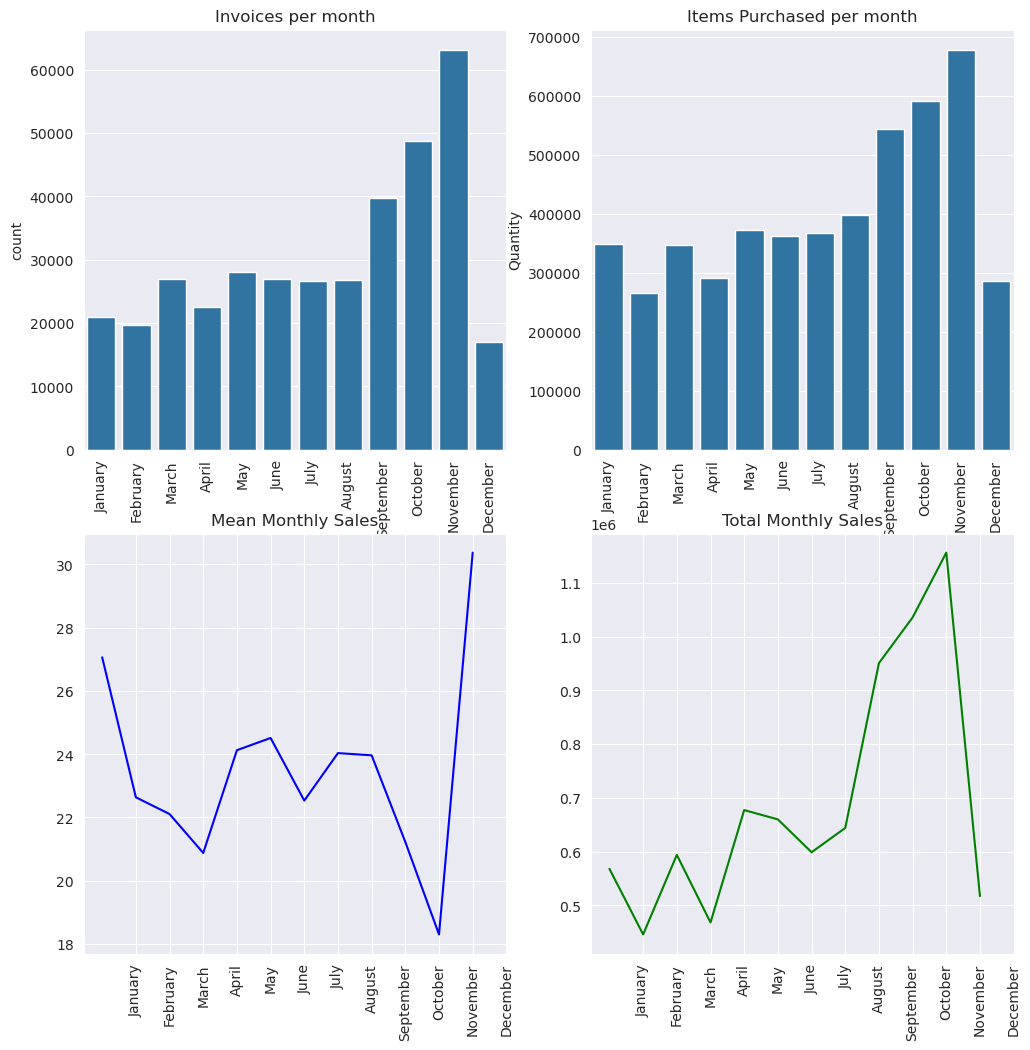

In [186]:
#Plot visuals

fig, ax = plt.subplots(2,2, figsize=(12,12))
sns.countplot(data=df, x=df.Month, ax=ax[0][0])
ax[0][0].set_title('Invoices per month')
ax[0][0].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)


sns.barplot(data=mq, x=mq.Month, y=mq.Quantity, ax=ax[0][1])
ax[0][1].set_title('Items Purchased per month')
ax[0][1].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)


ax[1][0].plot(ms['mean'], label='Average Sales', color='blue')
ax[1][0].set_xticks([i for i in np.arange(1,13,1)])
ax[1][0].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)
ax[1][0].set_title('Mean Monthly Sales')


ax[1][1].plot(ms['sum'], label='Total Sales', color='green')
ax[1][1].set_xticks([i for i in np.arange(1,13,1)])
ax[1][1].set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=90)
ax[1][1].set_title('Total Monthly Sales')


plt.show()

In [187]:
#Investigate the steep decline in sales for the month of December (which is unusual for the amount of Sales during this time of the year)

print('% of December Transactions: ', round(len(df.query('Month == 12')) * 100 / len(df), 2), '%')
print('Latest December Transaction: ', df.query('Month == 12')['InvoiceDate'].max() )

% of December Transactions:  4.64 %
Latest December Transaction:  2011-12-09 00:00:00


Most recent invoice was recorded only until Dec 9. The records appear incomplete as it did not capture the whole transactions for this month.

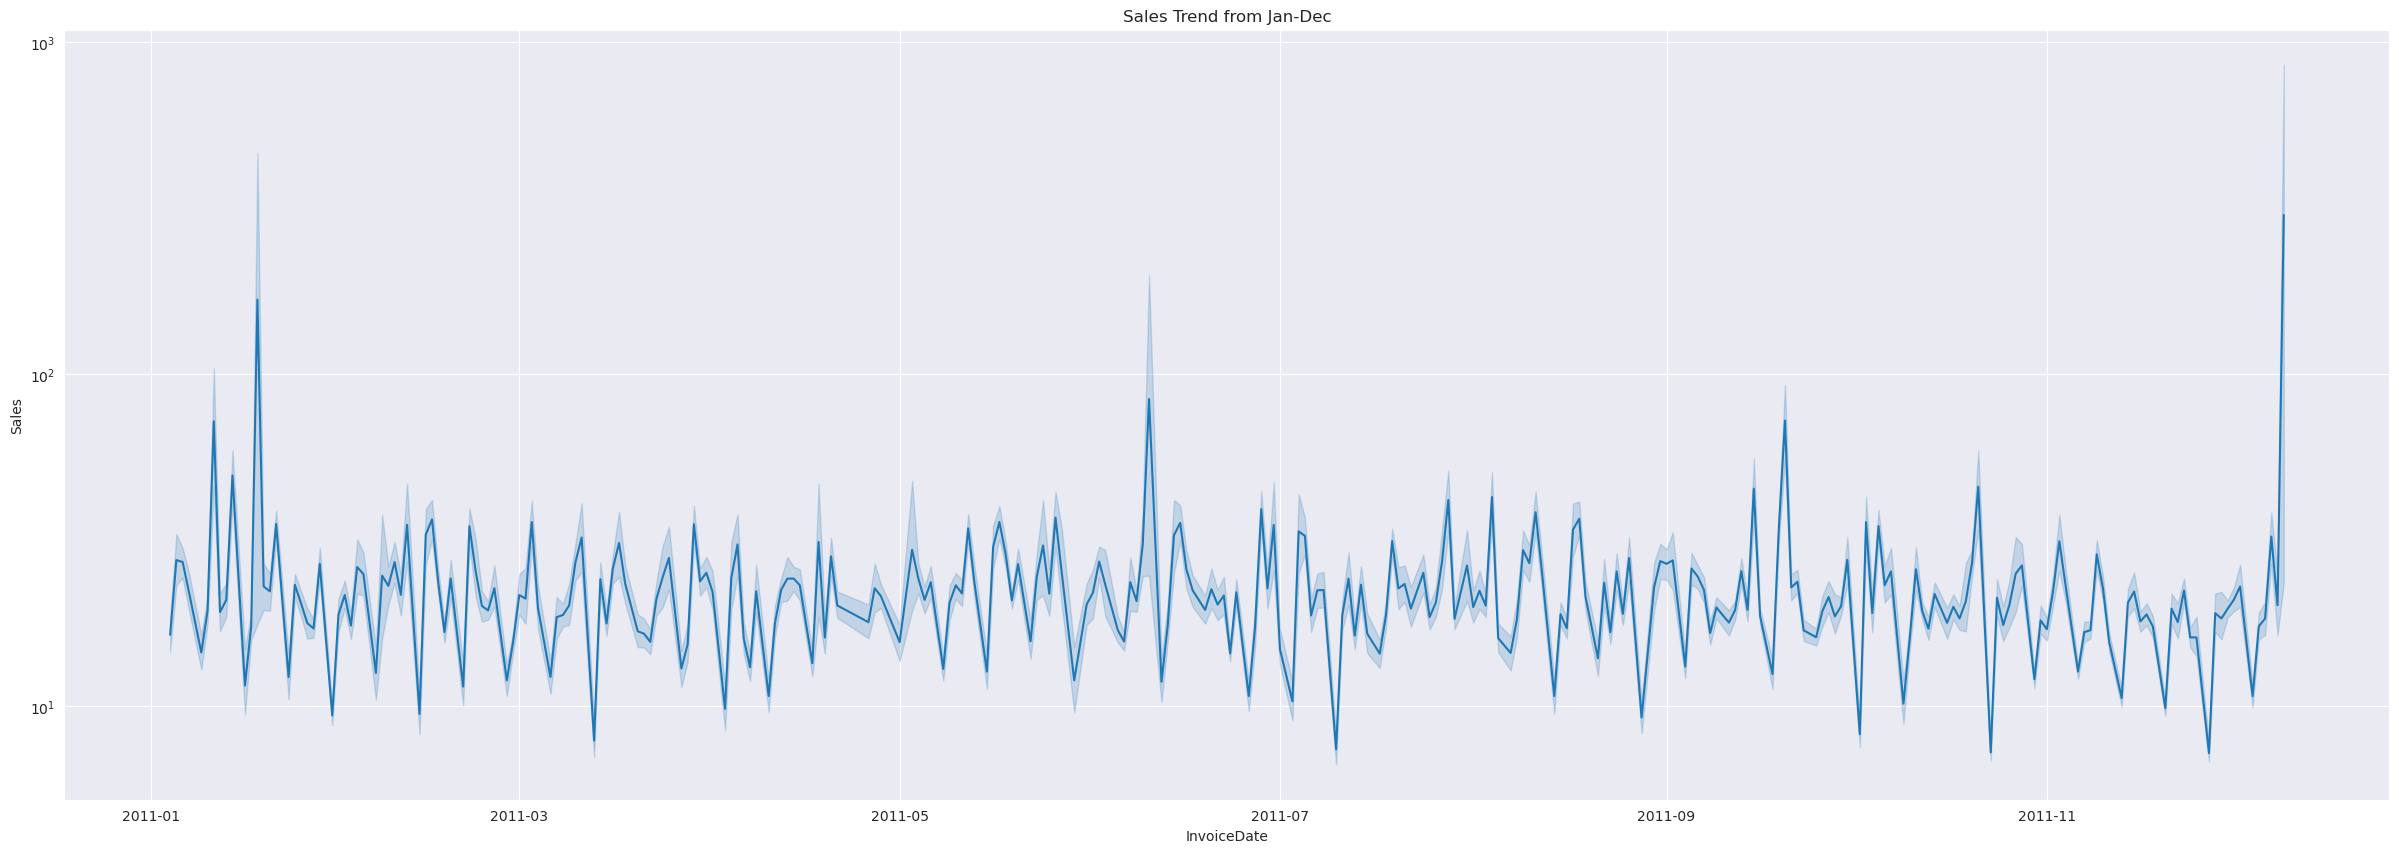

In [188]:
#Time Series Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.lineplot(data=df, x=df.InvoiceDate, y=df.Sales)
ax.set_title('Sales Trend from Jan-Dec')
plt.yscale('log')
plt.show()

**3.2 Obtaining Customer Transactions**

In [189]:
df_percust = df.groupby('CustomerID', as_index=False) \
    .agg( 
        LastPurchaseDate = ('InvoiceDate', 'max'),
        Frequency = ('Invoice', 'nunique'),
        Monetary = ('Sales', 'sum'))

In [190]:
recent_invdt = df['InvoiceDate'].max() #Ideally, should be the latest day of invoice (near today's date)
df_percust['Recency'] = (recent_invdt - df_percust['LastPurchaseDate']).dt.days
df_percust.head()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18,1,77183.60,325
1,12347,2011-12-07,6,3598.21,2
2,12348,2011-09-25,3,904.44,75
3,12349,2011-11-21,1,1757.55,18
4,12350,2011-02-02,1,334.40,310


Text(0.5, 1.0, 'Monetary Boxplot')

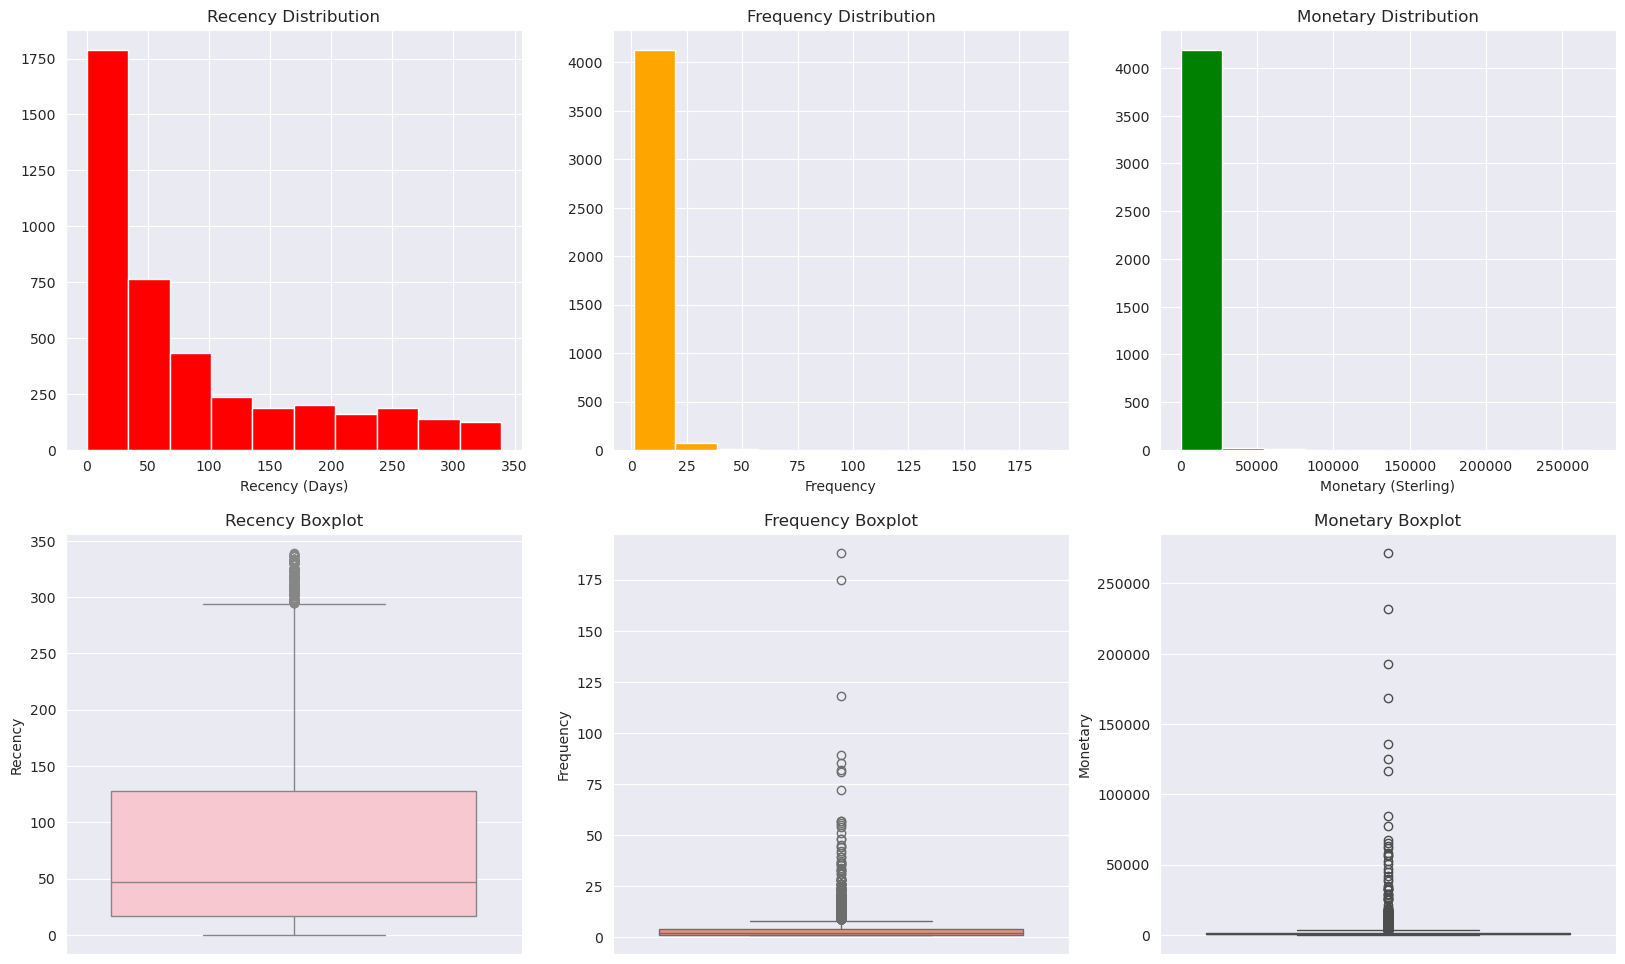

In [191]:
fig, ax= plt.subplots(2,3, figsize=(20,12))

#Recency
ax[0][0].hist(df_percust.Recency, bins=10, color='red')
ax[0][0].set_xlabel('Recency (Days)')
ax[0][0].set_title('Recency Distribution')
sns.boxplot(data=df_percust.Recency, color='pink', ax=ax[1,0])
ax[1][0].set_title('Recency Boxplot')

#Frequency
ax[0][1].hist(df_percust.Frequency, bins=10, color='orange')
ax[0][1].set_xlabel('Frequency')
ax[0][1].set_title('Frequency Distribution')
sns.boxplot(data=df_percust.Frequency, color='salmon', ax=ax[1,1])
ax[1][1].set_title('Frequency Boxplot')

#Monetary
ax[0][2].hist(df_percust.Monetary, bins=10, color='green')
ax[0][2].set_xlabel('Monetary (Sterling)')
ax[0][2].set_title('Monetary Distribution')
sns.boxplot(data=df_percust.Monetary, color='lime', ax=ax[1,2])
ax[1][2].set_title('Monetary Boxplot')


**3.3 Dealing with Outliers**


There are many outliers as can be seen from the R/F/M boxplots. These extreme values should not be discarded as they represent extreme behaviours by the customers, such as very big spending and very frequent purchases. A separate analysis should be performed with the outliers.

In [192]:
#Create a function for extracting outliers
def outliers(p_df, col):
    '''Desctiption: Function for computing outliers. 
    Input: (1)Dataframe, (2)column name.
    Return: rows of outliers in a dataframe'''

    q1 = p_df[col].quantile(0.25)
    q3 = p_df[col].quantile(0.75)
    iqr = q3 - q1
    outlier = p_df[( p_df[col] > (q3 + 1.5*iqr)) | (p_df[col] < (q1 - 1.5*iqr)) ]
    return outlier

In [193]:
#Big spenders: Monetaty outliers
m_outliers = outliers(df_percust, 'Monetary')
m_outliers.describe()
m_outliers

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12346,2011-01-18,1,77183.60,325
1,12347,2011-12-07,6,3598.21,2
10,12357,2011-11-06,1,6207.67,33
12,12359,2011-10-13,4,6310.03,57
15,12362,2011-12-06,10,5226.23,3
...,...,...,...,...,...
4174,18223,2011-12-05,13,5982.85,4
4176,18225,2011-12-06,11,5474.96,3
4177,18226,2011-10-26,11,5228.05,44
4180,18229,2011-11-28,18,6623.70,11


In [194]:
#Frequent buyers: Frequency outliers
f_outliers = outliers(df_percust, 'Frequency')
f_outliers.describe()
f_outliers

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
15,12362,2011-12-06,10,5226.23,3
39,12395,2011-11-20,10,2338.71,19
55,12415,2011-11-15,21,124914.53,24
66,12428,2011-11-14,9,7956.46,25
69,12431,2011-11-04,13,5713.50,35
...,...,...,...,...,...
4176,18225,2011-12-06,11,5474.96,3
4177,18226,2011-10-26,11,5228.05,44
4180,18229,2011-11-28,18,6623.70,11
4190,18241,2011-11-30,17,2073.09,9


**3.4 Preparing Data for K-Means Clustering**

In [195]:
df_nol = df_percust[ (~df_percust.index.isin(f_outliers.index)) &  (~df_percust.index.isin(m_outliers.index)) ]
print(f'No. of Non-outlier records:  {len(df_nol)} from {len(df_percust)} or {len(df_nol)*100/len(df_percust)} %' )

No. of Non-outlier records:  3675 from 4220 or 87.08530805687204 %


<Axes: ylabel='Monetary'>

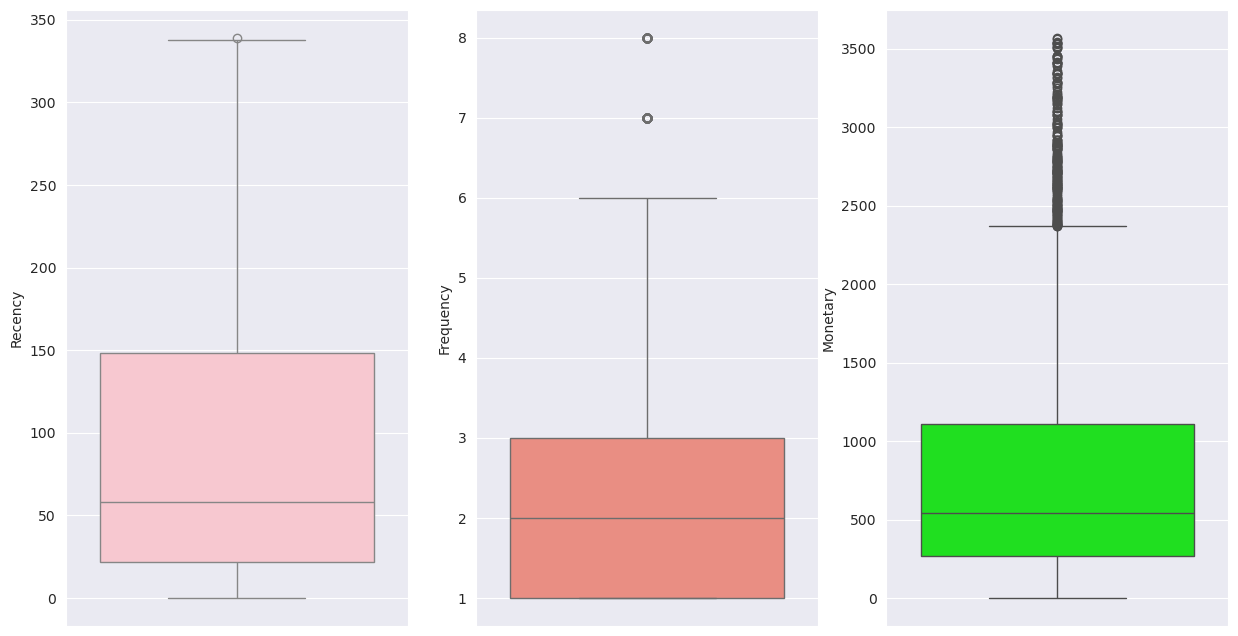

In [196]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

sns.boxplot(data=df_nol.Recency, color='pink', ax=ax[0])
sns.boxplot(data=df_nol.Frequency, color='salmon', ax=ax[1])
sns.boxplot(data=df_nol.Monetary, color='lime', ax=ax[2])

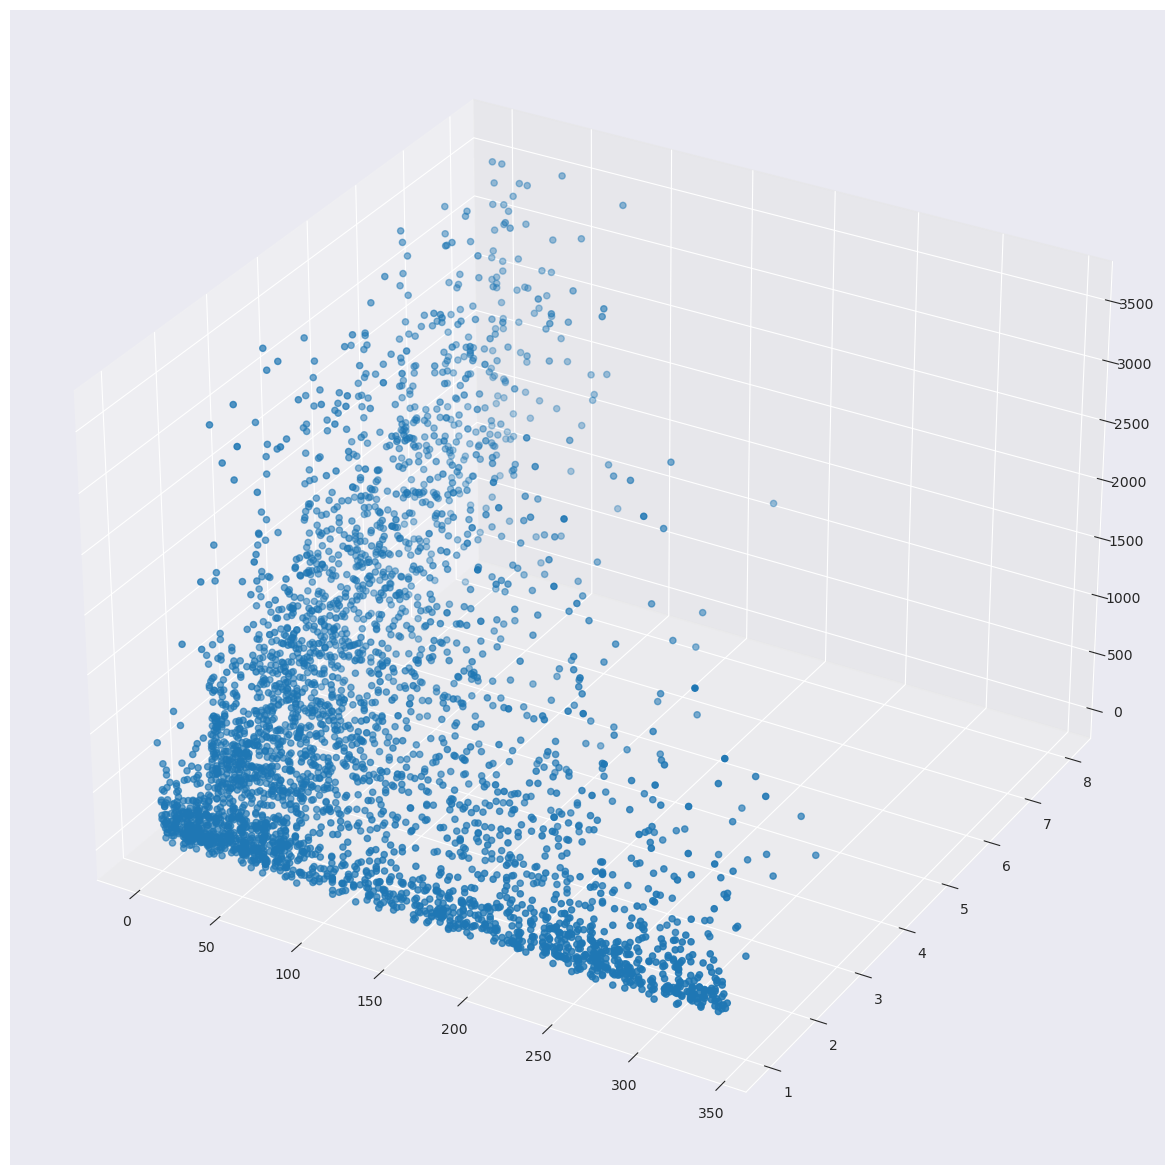

In [197]:
sns.set_style ("darkgrid")
plt.figure (figsize = (15,15))
seaborn_plt = plt.axes (projection='3d')
seaborn_plt.scatter3D(df_nol.Recency, df_nol.Frequency, df_nol.Monetary)

**3.5 Scaling the Data**

In [198]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler

In [199]:
df_nol.head()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
2,12348,2011-09-25,3,904.44,75
3,12349,2011-11-21,1,1757.55,18
4,12350,2011-02-02,1,334.40,310
5,12352,2011-11-03,8,2506.04,36
6,12353,2011-05-19,1,89.00,204


In [200]:
df_rfm = df_nol.drop('LastPurchaseDate', axis=1)
df_rfm = df_rfm.set_index('CustomerID')
temp_rfm_idx = df_rfm.index
temp_rfm_col = df_rfm.columns
df_rfm.head()

,Frequency,Monetary,Recency
CustomerID,,,
12348,3,904.44,75
12349,1,1757.55,18
12350,1,334.40,310
12352,8,2506.04,36
12353,1,89.00,204


In [201]:
rfm_scaled = scale(df_rfm)

In [202]:
df_rfm_scaled = pd.DataFrame(rfm_scaled, columns=temp_rfm_col, index=temp_rfm_idx)
display(df_rfm_scaled.head() )


,Frequency,Monetary,Recency
CustomerID,,,
12348,0.276151,0.136533,-0.201262
12349,-0.843379,1.285820,-0.820625
12350,-0.843379,-0.631410,2.352250
12352,3.074976,2.294165,-0.625036
12353,-0.843379,-0.962006,1.200453


In [203]:
print(df_rfm_scaled.mean())
print('\n',df_rfm_scaled.std())


Frequency   -8.797196e-17
Monetary    -7.733798e-18
Recency      3.093519e-17
dtype: float64

 Frequency    1.000136
Monetary     1.000136
Recency      1.000136
dtype: float64


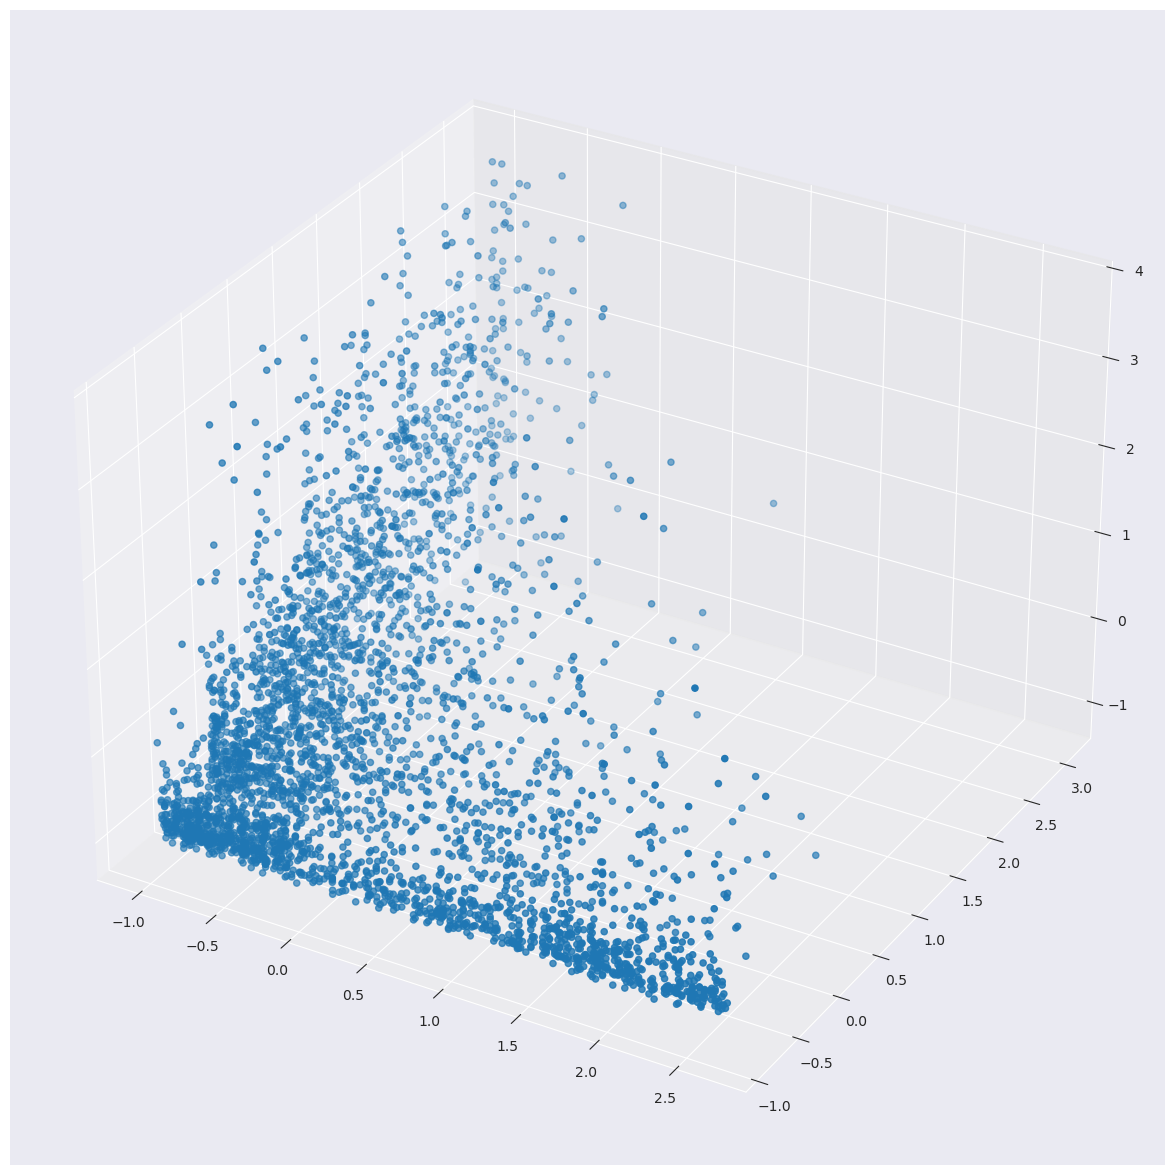

In [204]:
sns.set_style ("darkgrid")
plt.figure (figsize = (15,15))
seaborn_plt = plt.axes (projection='3d')
seaborn_plt.scatter3D(df_rfm_scaled.Recency, df_rfm_scaled.Frequency, df_rfm_scaled.Monetary)